In [ ]:
import pandas as pd
data = pd.read_csv('/content/data_no_outliers.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Overall Score,Pass/Fail
0,1.0,0.25,0.0,1.0,1.0,0.602410,0.525641,0.5625,0.527027,1
1,1.0,0.00,0.2,1.0,0.0,0.313253,0.282051,0.2250,0.202703,0
2,1.0,1.00,0.4,0.0,0.0,0.903614,0.743590,0.7875,0.797297,1
3,0.0,0.50,0.4,0.0,0.0,0.686747,0.615385,0.6375,0.608108,1
4,0.0,0.75,0.6,0.0,1.0,0.771084,0.858974,0.9000,0.824324,1


In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Check the class distribution before oversampling
print("Class distribution before oversampling:")
print(data['Pass/Fail'].value_counts())

# Assuming data is your DataFrame
# X should be the features, and y should be the target variable
X = data.drop('Pass/Fail', axis=1)
y = data['Pass/Fail']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Specify the desired sampling strategy for RandomOverSampler (1:1 ratio)
sampling_strategy = 1.0
ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("\nClass distribution after oversampling:")
print(pd.Series(y_train_resampled).value_counts())

Class distribution before oversampling:
1    674
0    235
Name: Pass/Fail, dtype: int64

Class distribution after oversampling:
0    473
1    473
Name: Pass/Fail, dtype: int64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Assuming data is your DataFrame
# X should be the features, and y should be the target variable
X = data.drop('Pass/Fail', axis=1)
y = data['Pass/Fail']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the classifier
print("Classification Report For Naive Bayes:")
print(classification_report(y_test, y_pred))


Classification Report For Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        72
           1       0.74      1.00      0.85       201

    accuracy                           0.74       273
   macro avg       0.87      0.51      0.44       273
weighted avg       0.81      0.74      0.63       273



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print additional metrics
print("\nAdditional Metrics for Naive Bayes:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Additional Metrics for Naive Bayes:
Accuracy: 0.73992673992674
Precision: 0.7389705882352942
Recall: 1.0
F1 Score: 0.849894291754757



Confusion Matrix for Naive Bayes:
[[  1  71]
 [  0 201]]


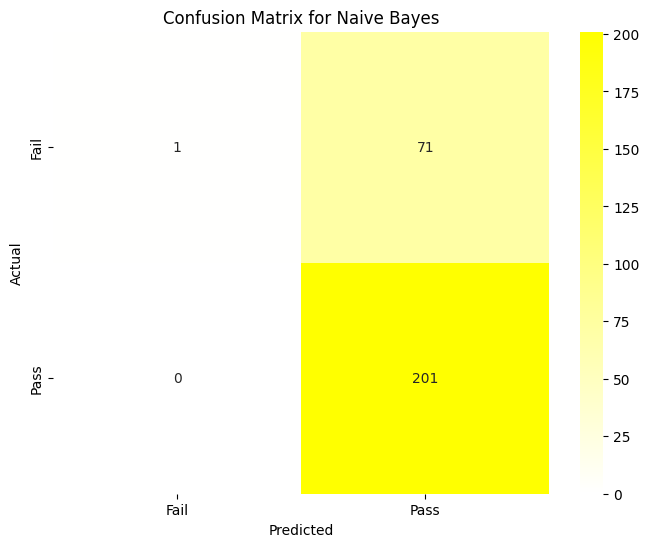

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from matplotlib.colors import LinearSegmentedColormap

# Obtain the confusion matrix for the Naive Bayes classifier
conf_matrix_nb = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix for Naive Bayes:")
print(conf_matrix_nb)

# Create a custom colormap from white to yellow
cmap_colors_yellow = [(1, 1, 1), (1, 1, 0)]  # (white, yellow)
custom_cmap_yellow = LinearSegmentedColormap.from_list("custom_yellow", cmap_colors_yellow, N=256)

# Plot the confusion matrix as a heatmap for Naive Bayes with yellow
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, cmap=custom_cmap_yellow, fmt='d', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')

# Save the figure (using bbox_inches='tight' to avoid cropping)
plt.savefig('naive_bayes.png', bbox_inches='tight')

# Display the plot
plt.show()




In [ ]:
plt.savefig('confusion_matrix_naive_bayes.png')

<Figure size 640x480 with 0 Axes>